In [2]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [3]:
###Import af data

dfklip = pd.read_csv('uge35klippelog.csv')

dfpogo = pd.read_csv('uge35moist2.csv')

dfstimp = pd.read_csv('uge35stimp.csv')

print("Clipdata:")
print (dfklip.describe())

print("\nPogo:")
print (dfpogo.describe())

print("\nStimp:")
print(dfstimp.describe())

Clipdata:
               Hul
count  4340.000000
mean     10.500000
std       5.766946
min       1.000000
25%       5.750000
50%      10.500000
75%      15.250000
max      20.000000

Pogo:
          Dataset  Moisture (Avg) (%)  Moisture (Min) (%)  Moisture (Max) (%)
count  487.000000          487.000000          487.000000          487.000000
mean     1.002053           25.706160           18.919918           34.519507
std      0.045314            3.045006            3.725089            4.091938
min      1.000000           13.900000            0.000000           20.000000
25%      1.000000           23.550000           17.000000           32.000000
50%      1.000000           25.900000           19.000000           35.000000
75%      1.000000           27.900000           22.000000           37.000000
max      2.000000           33.500000           28.000000           46.000000

Stimp:
         Stimp CM  Bobble  Chatter  Snaking  Trueness
count  348.000000     0.0      0.0      0.0     

In [4]:
dfklip.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,Rulle,Led,Unnamed: 12
0,16/04/2023,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,16/04/2023,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2,16/04/2023,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,16/04/2023,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
4,16/04/2023,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN


In [5]:
###Datacleaning - Drop values + cols 



dfstimp = dfstimp[dfstimp.columns[:dfstimp.columns.get_loc('Stimp F') + 1]]
dfstimp = dfstimp.dropna(subset=['Dato'])


print(dfstimp.head())

         Dato     Hul  Stimp CM Stimp F
0  10/05/2023  Hul 15     249.0     8,2
1  10/05/2023  Hul 15     246.0     8,1
2  10/05/2023  Hul 15     248.0     8,1
3  10/05/2023  Hul 15     273.0     9,0
4  10/05/2023  Hul 15     280.0     9,2


In [6]:
### Datacleaning værdiger
dfklip['Liter'] = dfklip['Liter'].astype(str).str.replace(',','.')

dfstimp = dfstimp.rename(columns={'Stimp F': 'Stimp_F'})
dfstimp = dfstimp.rename(columns={'Stimp CM': 'Stimp_CM'})
dfstimp['Stimp_F'] = dfstimp['Stimp_F'].astype(str).str.replace(',','.').astype(float)

dfpogo[['Dato','Time']] = dfpogo['Sample Date'].str.split(' ', n=1,expand=True)
dfpogo = dfpogo.drop(columns=['Sample Date'])


In [7]:
def categorize_stimp(stimp):
    if pd.isna(stimp):
        return None
    elif stimp < 9:
        return 'Low'
    elif 10 <= stimp <= 10.5:
        return 'Target range'
    else:
        return 'High'
    
dfstimp['Stimp_range'] = dfstimp['Stimp_F'].apply(categorize_stimp)


In [8]:
###Datacleaning Dato til pd.datetime
from datetime import datetime, timedelta

dfklip['Dato'] = pd.to_datetime(dfklip['Dato'], format='%d/%m/%Y', dayfirst=True)
dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'], format='%d/%m/%Y', dayfirst=True)
dfpogo['Dato'] = pd.to_datetime(dfpogo['Dato'], format='%Y-%m-%d')

dfklip['Week'] = dfklip['Dato'].dt.isocalendar().week
dfstimp['Week'] = dfstimp['Dato'].dt.isocalendar().week
dfpogo['Week'] = dfpogo['Dato'].dt.isocalendar().week

dfklip['Month'] = dfklip['Dato'].dt.month
dfstimp['Month'] = dfstimp['Dato'].dt.month
dfpogo['Month'] = dfpogo['Dato'].dt.month

dfklip['Year'] = dfklip['Dato'].dt.year
dfstimp['Year'] = dfstimp['Dato'].dt.year
dfpogo['Year']  = dfpogo['Dato'].dt.year

print("Cleaned dfklip:")
print(dfklip.head())
print("\nCleaned dfstimp:")
print(dfstimp.head())
print("\nCleaned dfpogo:")
print(dfpogo.head())

Cleaned dfklip:
        Dato Retning  Hul Liter Maskine Højde Bemærkning Person Cleanup Brush  \
0 2023-04-16     NaN    1     4     NaN   NaN        NaN    NaN      No   NaN   
1 2023-04-16     NaN    2     6     NaN   NaN        NaN    NaN      No   NaN   
2 2023-04-16     NaN    3     5     NaN   NaN        NaN    NaN      No   NaN   
3 2023-04-16     NaN    4     8     NaN   NaN        NaN    NaN      No   NaN   
4 2023-04-16     NaN    5     4     NaN   NaN        NaN    NaN      No   NaN   

  Rulle  Led Unnamed: 12  Week  Month    Year  
0   NaN  NaN         NaN    15    4.0  2023.0  
1   NaN  NaN         NaN    15    4.0  2023.0  
2   NaN  NaN         NaN    15    4.0  2023.0  
3   NaN  NaN         NaN    15    4.0  2023.0  
4   NaN  NaN         NaN    15    4.0  2023.0  

Cleaned dfstimp:
        Dato     Hul  Stimp_CM  Stimp_F Stimp_range  Week  Month  Year
0 2023-05-10  Hul 15     249.0      8.2         Low    19      5  2023
1 2023-05-10  Hul 15     246.0      8.1         L

<function matplotlib.pyplot.show(close=None, block=None)>

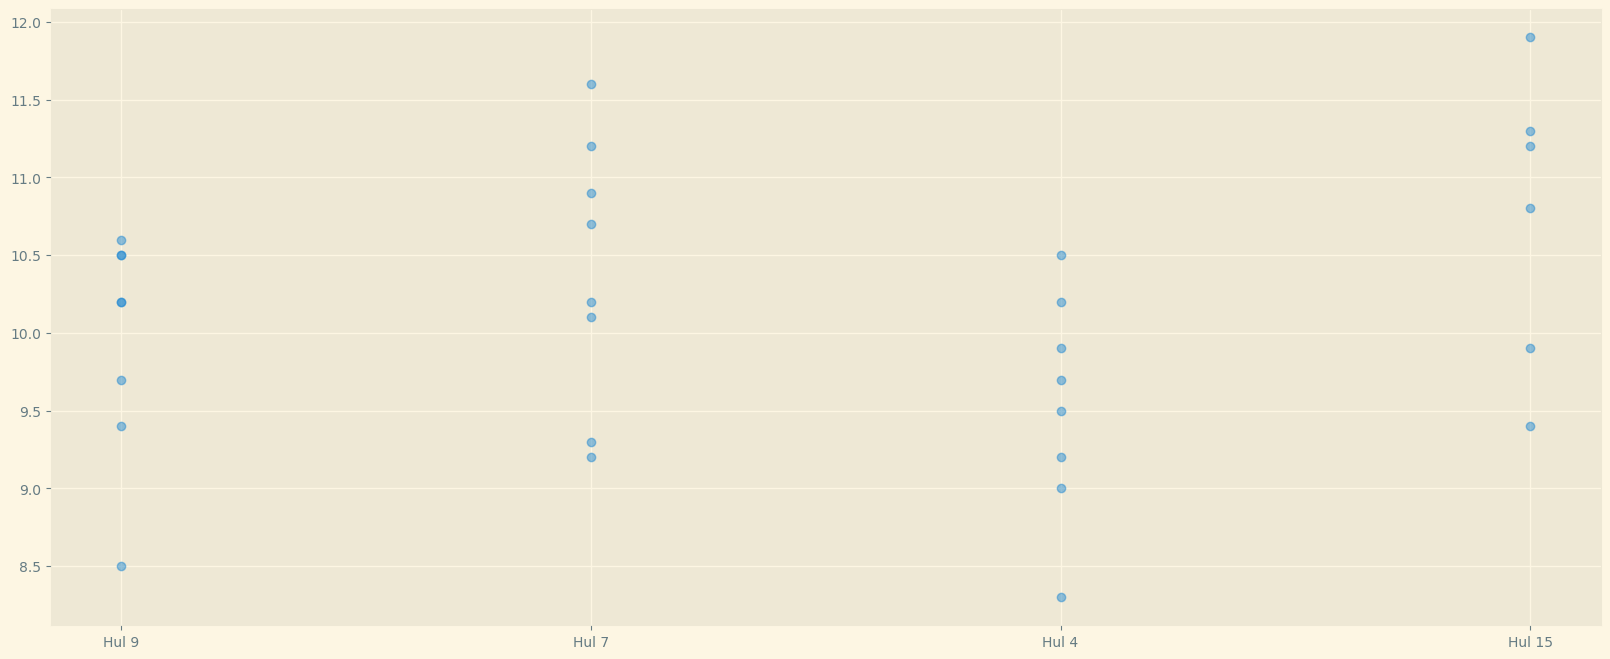

In [9]:
uge_29_stimp = dfstimp[dfstimp['Week'] == 29]

plt.figure(figsize=(20,8))
plt.scatter(uge_29_stimp['Hul'],uge_29_stimp['Stimp_F'],alpha=0.5)
plt.show



Average ml/m2 per Green:
    Hul  ml_per_m2
0     1  17.366062
1     2  16.597510
2     3  16.411998
3     4  20.084830
4     5  16.778523
5     6  18.266667
6     7  17.236467
7     8  18.058691
8     9  16.140351
9    10  20.274914
10   11  17.254902
11   12  19.503546
12   13  18.575324
13   14  18.654434
14   15  15.911172
15   16  21.146617
16   17  20.998677
17   18  16.588603
18   19  10.063320
19   20   8.515815


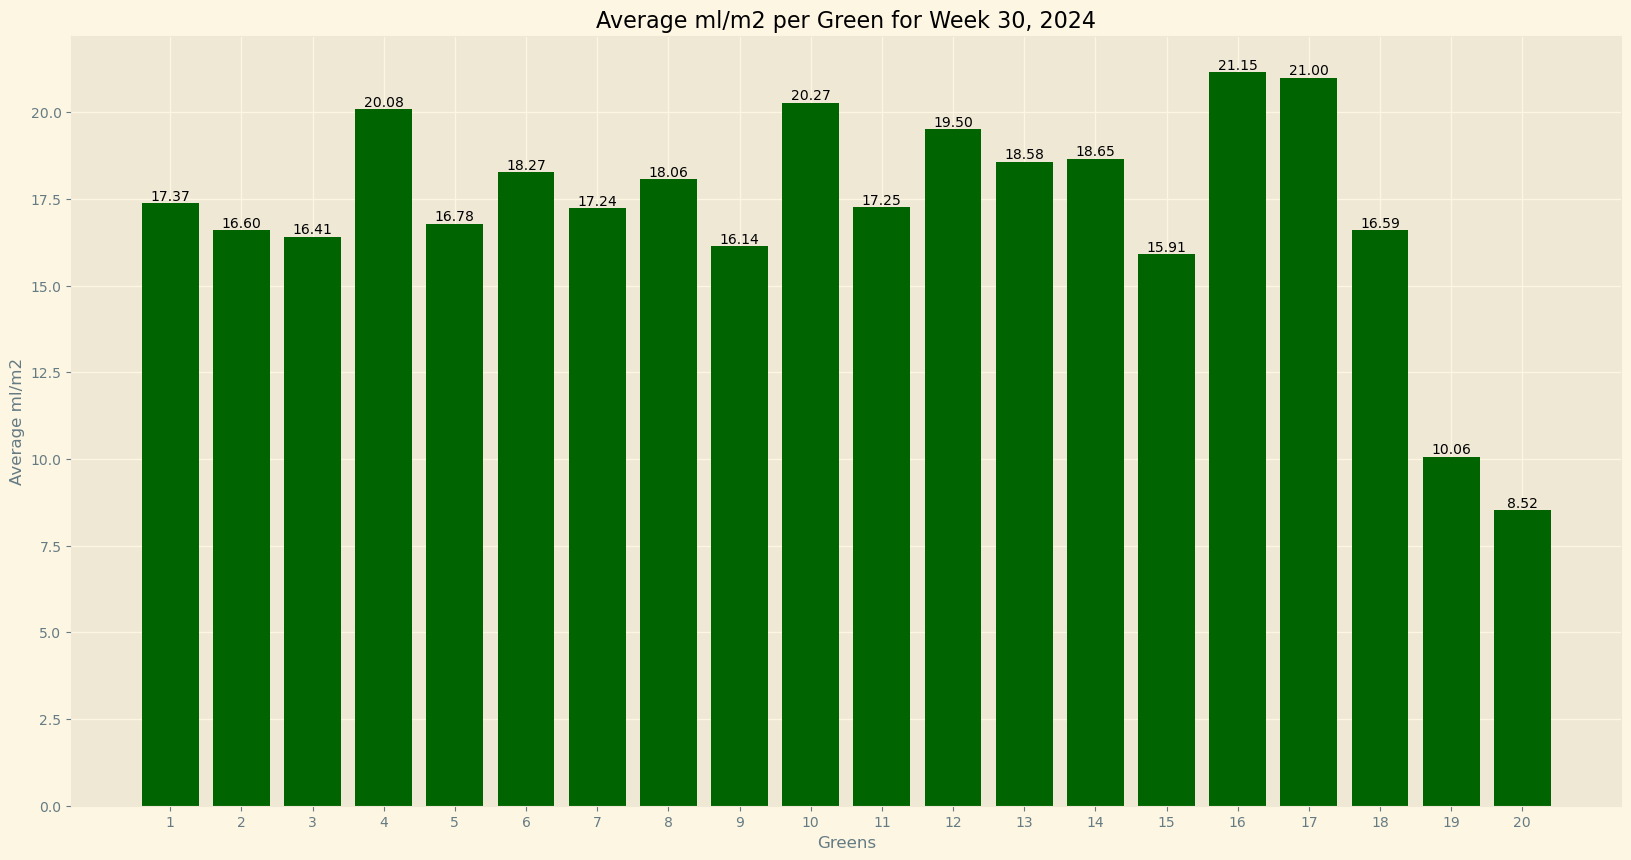

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

###ÆNDRE HER FOR ANDEN UGE 
mlm2_uge = dfklip[(dfklip['Week'] == 30) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string for matching green sizes
mlm2_uge['Hul'] = mlm2_uge['Hul'].astype(str)

# Calculate ml/m²
mlm2_uge['Green Size'] = mlm2_uge['Hul'].map(green_sizes)
mlm2_uge['Liter'] = mlm2_uge['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_uge['ml_per_m2'] = (mlm2_uge['Liter'] * 1000) / mlm2_uge['Green Size']

# Group by 'Hul' to calculate the average ml_per_m2 per green
average_ml_per_m2 = mlm2_uge.groupby('Hul')['ml_per_m2'].mean().reset_index()

# Ensure all 'Hul' values from 1 to 20 are included
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(20, 10))
bars = plt.bar(average_ml_per_m2['Hul'], average_ml_per_m2['ml_per_m2'], color='darkgreen')
plt.xlabel('Greens')
plt.ylabel('Average ml/m2')
plt.title('Average ml/m2 per Green for Week 30, 2024')
plt.xticks(ticks=average_ml_per_m2['Hul'], labels=average_ml_per_m2['Hul'])

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [11]:
import matplotlib.dates as mdates
# Filter the data for the specific week and year
weeks = [29,30]
line_month = dfklip[(dfklip['Year'] == year) & (dfklip['Dato'].dt.month == month)]

line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)




# Group the data by 'dato' and sum the 'Liter' column
line_liter = line_month.groupby('Dato')['Liter'].sum()
total_week_liters =line_liter.sum()
# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
line_liter.plot(kind='line', marker='o',color='darkgreen')
plt.title('Total liters per day week 29 - 30 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())


# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

plt.legend([f'Total liter sum:{total_week_liters:.2f}'], loc='upper right')

plt.show()



NameError: name 'month' is not defined

Average ml/m2 per Green:
    Hul          7          8
0     1  15.477122  18.682227
1     2  15.752267  18.706777
2     3  14.934289  18.704018
3     4  16.827456  22.330339
4     5  14.914243  17.673378
5     6  16.118519  21.040000
6     7  16.081038  18.746439
7     8  15.884959  18.246802
8     9  14.970760  17.228070
9    10  17.334861  20.034364
10   11  15.599129  17.725490
11   12  17.843071  19.706180
12   13  16.511399  17.552829
13   14  16.139993  18.379205
14   15  14.575702  16.094322
15   16  18.518519  20.739348
16   17  19.069665  19.642857
17   18  13.921416  16.315379
18   19   8.693904  11.784512
19   20   8.110300   8.248175


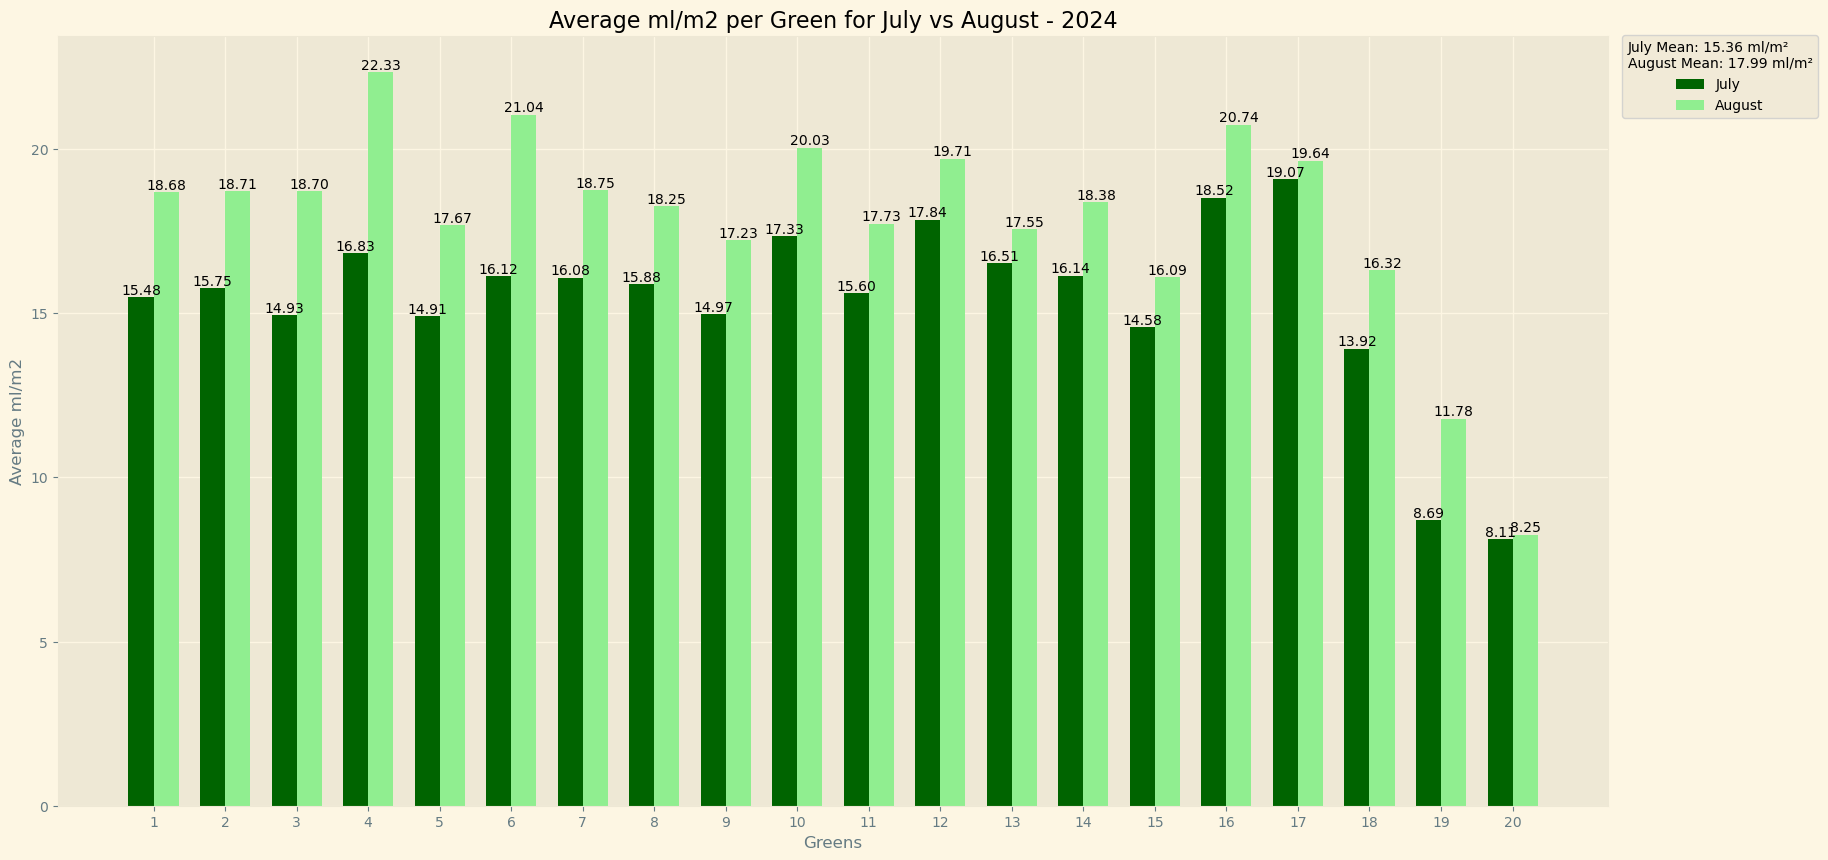

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

# Filter data for two months
month1 = 7  # Example for July
month2 = 8  # Example for August
year = 2024

# Filter data by month and year
mlm2_months = dfklip[(dfklip['Month'].isin([month1, month2])) & (dfklip['Year'] == year)]

# Ensure 'Hul' is string for matching green sizes
mlm2_months['Hul'] = mlm2_months['Hul'].astype(str)

# Calculate ml/m²
mlm2_months['Green Size'] = mlm2_months['Hul'].map(green_sizes)
mlm2_months['Liter'] = mlm2_months['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_months['ml_per_m2'] = (mlm2_months['Liter'] * 1000) / mlm2_months['Green Size']

# Add a 'Month' column to group by month
mlm2_months['Month'] = mlm2_months['Dato'].dt.month

# Group by 'Hul' and 'Month' to calculate the average ml_per_m2 per green per month
average_ml_per_m2 = mlm2_months.groupby(['Hul', 'Month'])['ml_per_m2'].mean().reset_index()

# Calculate the overall mean ml/m² for each month
mean_ml_per_m2_month1 = mlm2_months[mlm2_months['Month'] == month1]['ml_per_m2'].mean()
mean_ml_per_m2_month2 = mlm2_months[mlm2_months['Month'] == month2]['ml_per_m2'].mean()

# Ensure all 'Hul' values from 1 to 20 are included for each month
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = average_ml_per_m2.pivot(index='Hul', columns='Month', values='ml_per_m2').reset_index()
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with two bars per 'Hul' for each month
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.35
index = average_ml_per_m2['Hul']

bar1 = ax.bar(index - bar_width/2, average_ml_per_m2[month1], bar_width, label=f'July', color='darkgreen')
bar2 = ax.bar(index + bar_width/2, average_ml_per_m2[month2], bar_width, label=f'August', color='lightgreen')

ax.set_xlabel('Greens')
ax.set_ylabel('Average ml/m2')
ax.set_title(f'Average ml/m2 per Green for July vs August - {year}')
ax.set_xticks(index)
ax.set_xticklabels(average_ml_per_m2['Hul'])

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Update legend with mean values
legend_title = (f'July Mean: {mean_ml_per_m2_month1:.2f} ml/m²\n'
                f'August Mean: {mean_ml_per_m2_month2:.2f} ml/m²')
ax.legend(title=legend_title, loc='upper right', bbox_to_anchor=(1.14, 1.01))

# Show the plot
plt.show()


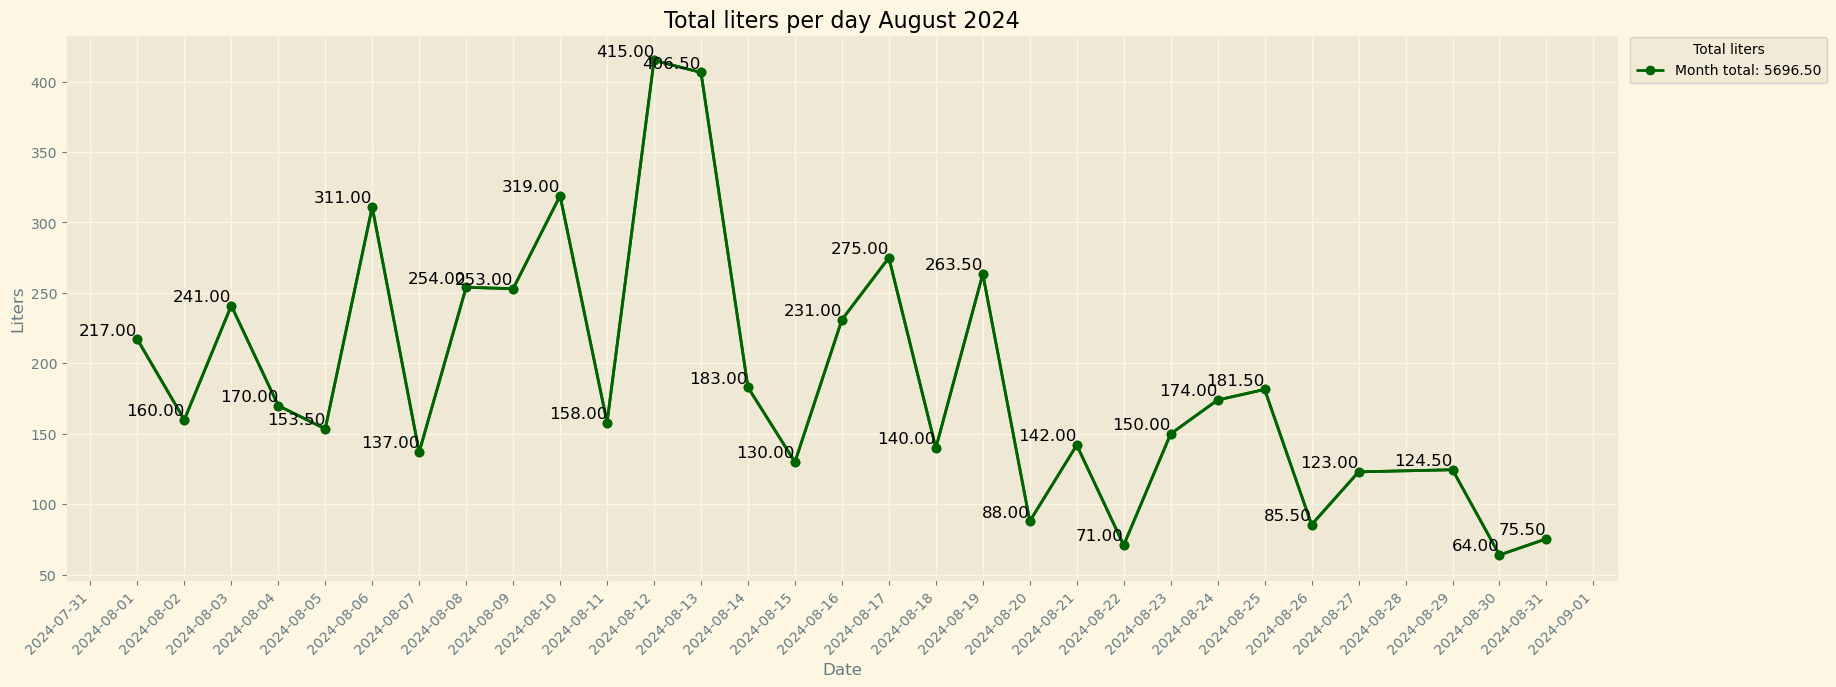

In [ ]:
month = 8  # Example for August
year = 2024
line_month = dfklip[(dfklip['Year'] == year) & (dfklip['Dato'].dt.month == month)]

line_month['Hul'] = line_month['Hul'].astype(str)
line_month['Liter'] = line_month['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_month.groupby('Dato')['Liter'].sum()

# Calculate total liters for each week separately
total_month_liters = line_month['Liter'].sum()


# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day August 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Update the legend to show total for the month
plt.legend([f'Month total: {total_month_liters:.2f}'], loc='upper right', title='Total liters', bbox_to_anchor=(1.14, 1.01))

plt.show()

Month  Hul          7          8
0        4   9.850000  10.122222
1        7  10.623333  10.859259
2        9  10.373333  10.796552
3       12   0.000000   9.200000
4       13  10.200000  11.030769
5       15  11.161538  11.632143
6       17  11.350000  11.173077

Stimp_avg_7 10.489166666666668
Stimp_avg_8 10.92560975609756


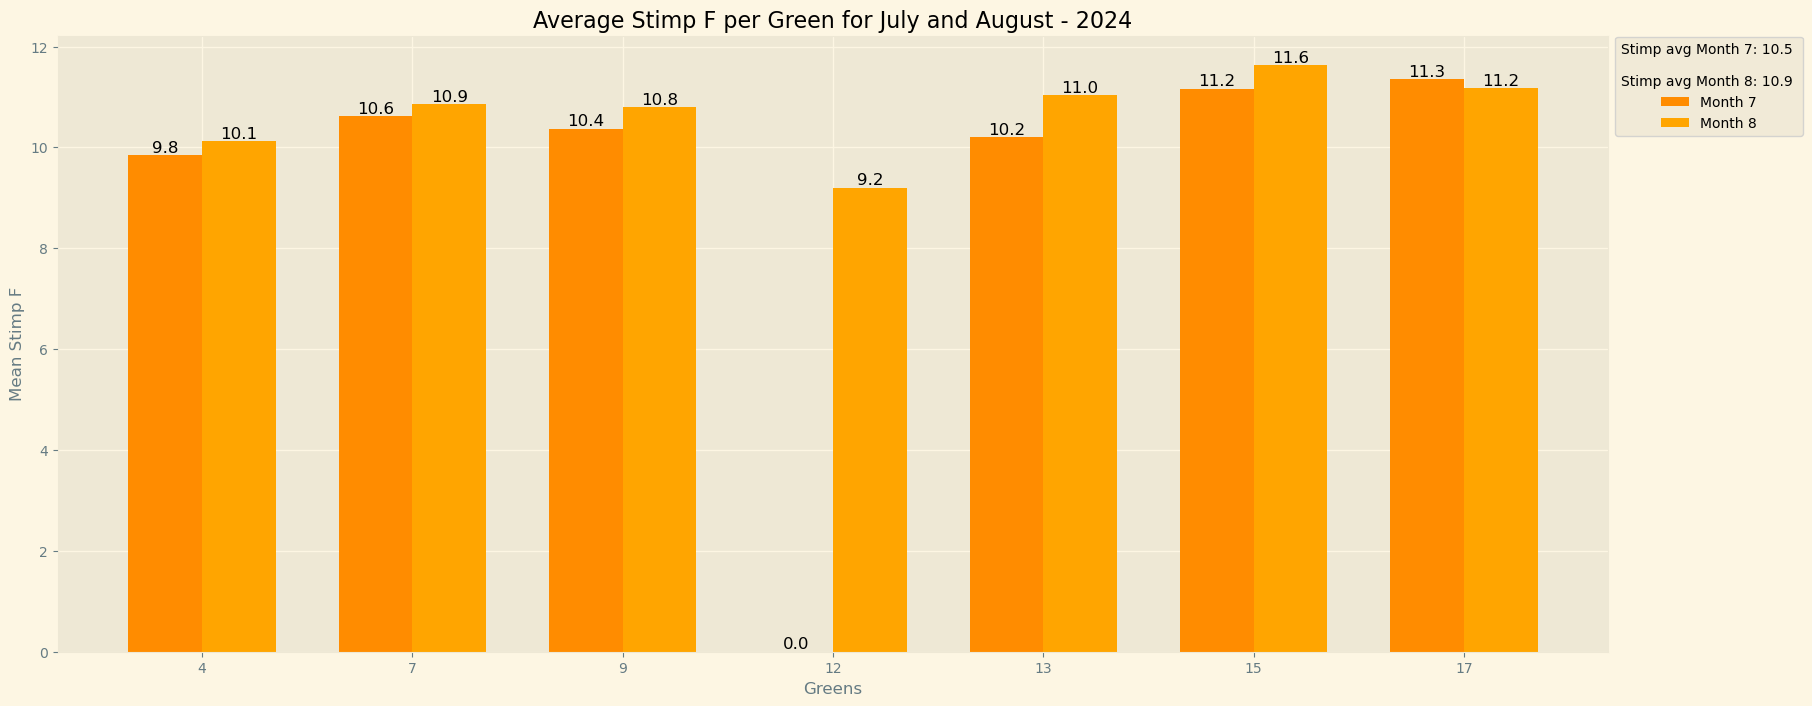

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Hul' is string and then extract numeric parts
dfstimp['Hul'] = dfstimp['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the months and year for comparison
month1 = 7  # Example for July
month2 = 8  # Example for August
year = 2024

# Filter the data for the selected months and year
stimp_months = dfstimp[(dfstimp['Month'].isin([month1, month2])) & (dfstimp['Year'] == year)]

# Group by 'Hul' and 'Month' to calculate the mean Stimp F per green per month
mean_stimp = stimp_months.groupby(['Hul', 'Month'])['Stimp_F'].mean().reset_index()

# Pivot the data to have months as columns
mean_stimp_pivot = mean_stimp.pivot(index='Hul', columns='Month', values='Stimp_F').reset_index().fillna(0)

# Calculate the overall average Stimp F for each month
stimp_avg_month1 = stimp_months[stimp_months['Month'] == month1]['Stimp_F'].mean()
stimp_avg_month2 = stimp_months[stimp_months['Month'] == month2]['Stimp_F'].mean()

# Print the result to ensure it is correct
print(mean_stimp_pivot)
print(f"\nStimp_avg_{month1}", stimp_avg_month1)
print(f"Stimp_avg_{month2}", stimp_avg_month2)

# Plot the bar chart with two bars per 'Hul' for each month
fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.35
index = range(len(mean_stimp_pivot))

bar1 = ax.bar([i - bar_width/2 for i in index], mean_stimp_pivot[month1], bar_width, label=f'Month {month1}', color='darkorange')
bar2 = ax.bar([i + bar_width/2 for i in index], mean_stimp_pivot[month2], bar_width, label=f'Month {month2}', color='orange')

ax.set_xlabel('Greens')
ax.set_ylabel('Mean Stimp F')
ax.set_title(f'Average Stimp F per Green for July and August - {year}')
ax.set_xticks(index)
ax.set_xticklabels(mean_stimp_pivot['Hul'])
ax.legend(title=f'Stimp avg Month {month1}: {stimp_avg_month1:.1f} \n\nStimp avg Month {month2}: {stimp_avg_month2:.1f}', loc='upper right', bbox_to_anchor=(1.13, 1.01))

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.show()


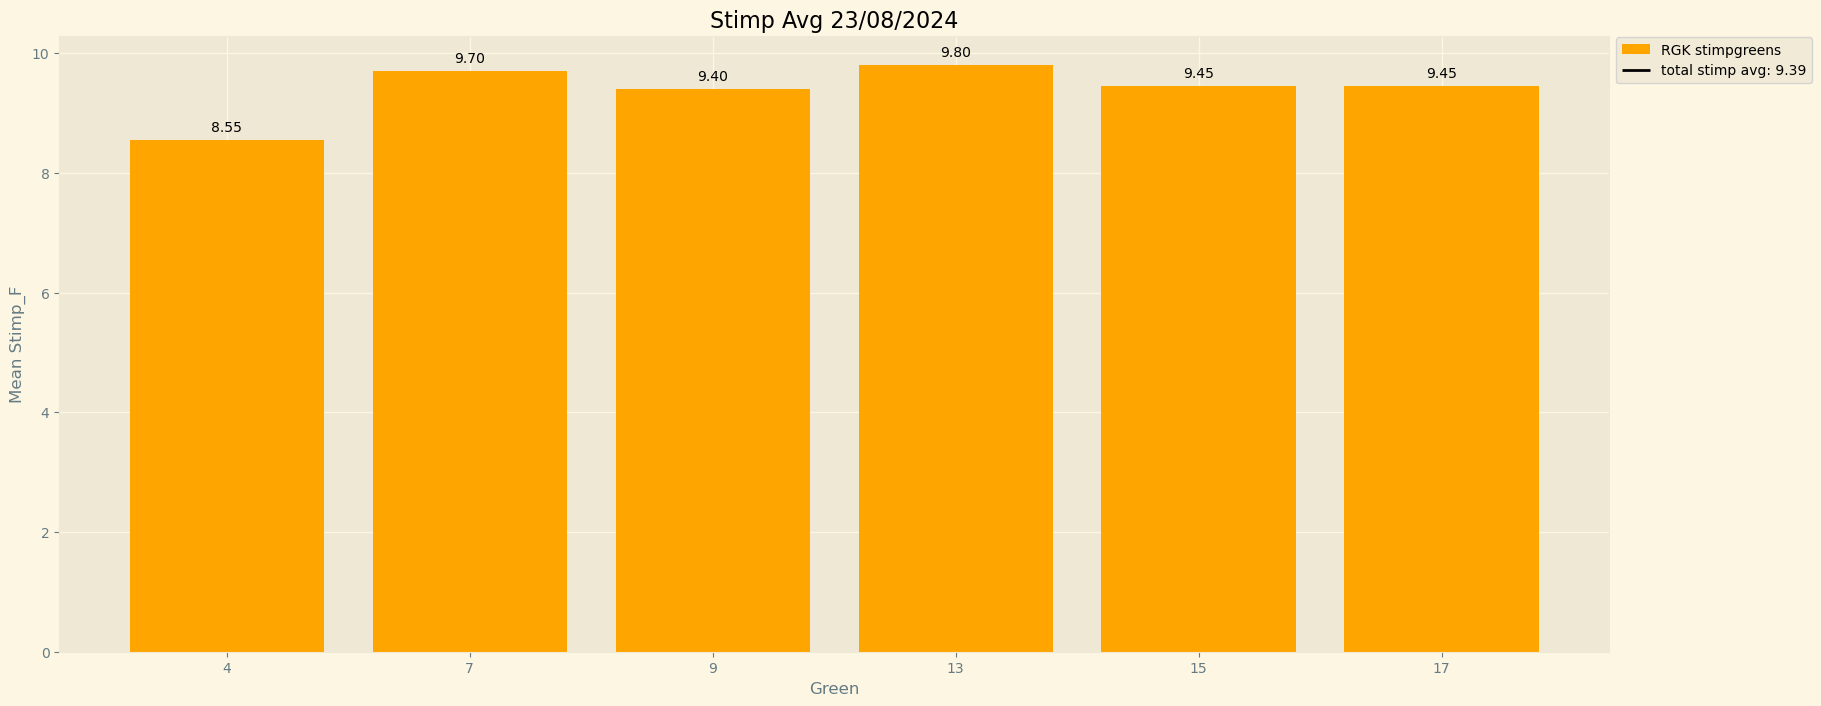

In [ ]:
# Filter the data for the date 07/08/2024
df_filtered = dfstimp[dfstimp['Dato'] == '2024-08-19']

# Ensure 'Hul' column is in the correct format
df_filtered['Hul'] = df_filtered['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the greens
greens = [4, 7, 9,13,15,17]

# Calculate the mean Stimp_F for each green
mean_stimp_f = [df_filtered[df_filtered['Hul'] == green]['Stimp_F'].mean() for green in greens]

# Calculate the total mean Stimp_F for all selected greens
total_mean_stimp_f = df_filtered['Stimp_F'].mean()

# Creating the bar chart
plt.figure(figsize=(20, 8))

# Plotting bars for the greens
bars = plt.bar(range(len(greens)), mean_stimp_f, color='orange', label='RGK stimpgreens')

# Adding labels and title
plt.xlabel('Green')
plt.ylabel('Mean Stimp_F')
plt.title('Stimp Avg 23/08/2024')
plt.xticks(range(len(greens)), labels=[str(green) for green in greens])

# Adding the total mean to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='black', label=f'total stimp avg: {total_mean_stimp_f:.2f}'))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.960))

# Adding labels with the values on each bar
for bar, mean in zip(bars, mean_stimp_f):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{mean:.2f}', ha='center', va='bottom')

# Displaying the plot
plt.show()

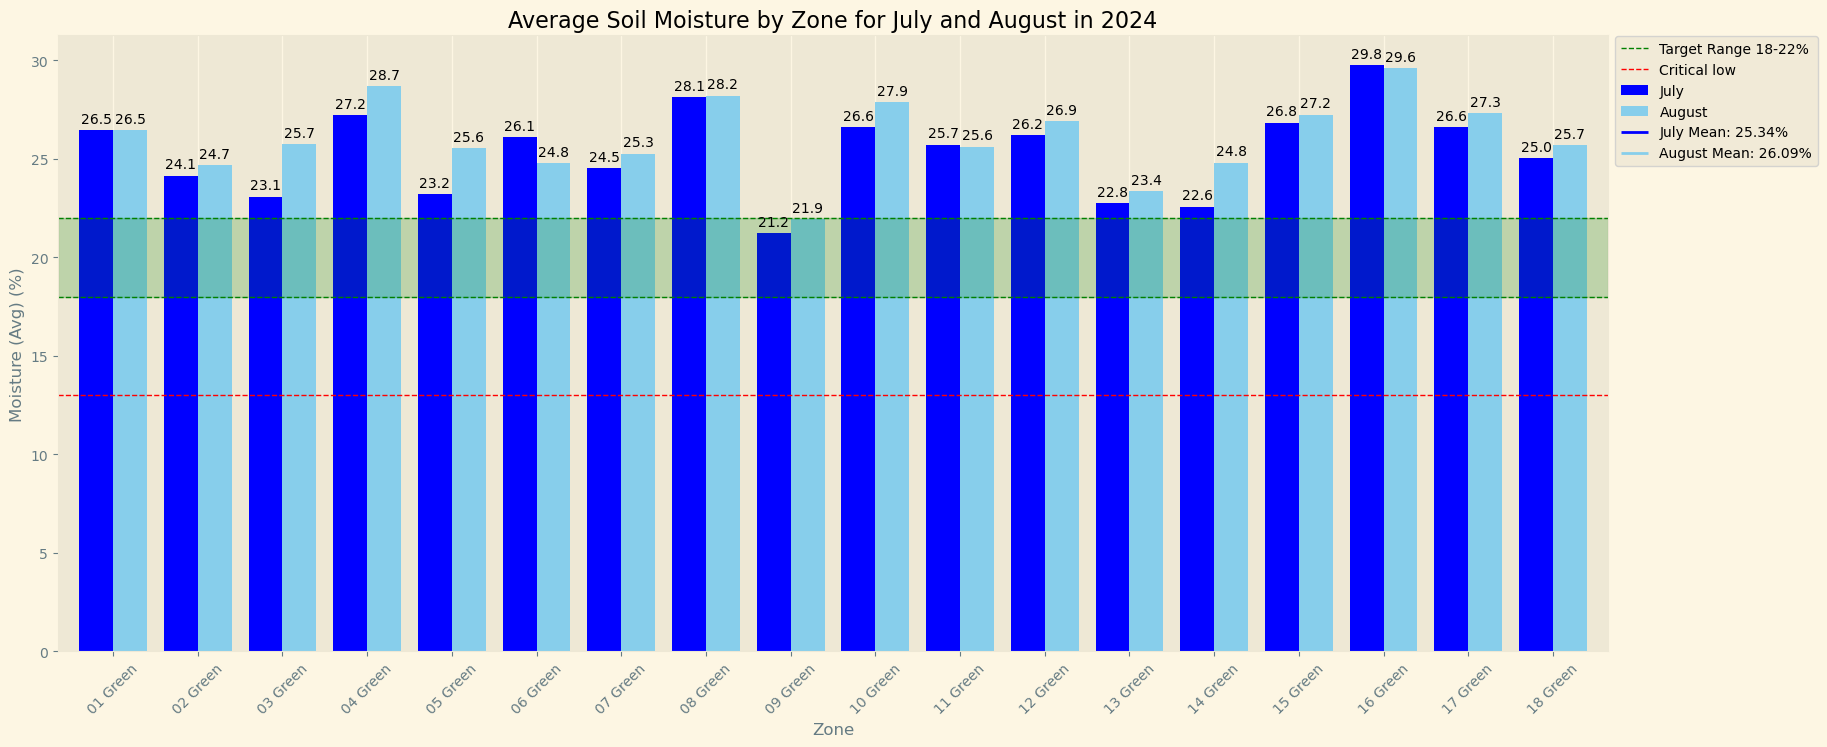

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the months and year for comparison
month1 = 7  # July
month2 = 8  # August
year = 2024

# Filter data by month and year
df_filtered = dfpogo[(dfpogo['Month'].isin([month1, month2])) & (dfpogo['Year'] == year)]

# Extract just the date part from 'Sample Date'
df_filtered['Dato'] = df_filtered['Dato'].dt.date

# Group by 'Zone' and 'Month' to calculate mean soil moisture
grouped_df = df_filtered.groupby(['Zone', 'Month'])['Moisture (Avg) (%)'].mean().unstack()

# Rename the columns to 'July' and 'August'
grouped_df.columns = ['July', 'August']

# Calculate the mean for July and August
mean_july = grouped_df['July'].mean().round(2)
mean_august = grouped_df['August'].mean().round(2)

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['Blue', 'skyblue'])
plt.title(f'Average Soil Moisture by Zone for July and August in {year}')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1)

# Adding a red dotted line at 13%
plt.axhline(y=13, color='red', linestyle='--', linewidth=1, label='Critical low')

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with monthly means and the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='blue', label=f'July Mean: {mean_july:.2f}%'))
handles.append(plt.Line2D([], [], color='skyblue', label=f'August Mean: {mean_august:.2f}%'))
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()



Number of days in August 2024 with Stimp_F within target range: 2
Percentage of days within target range: 12.50%


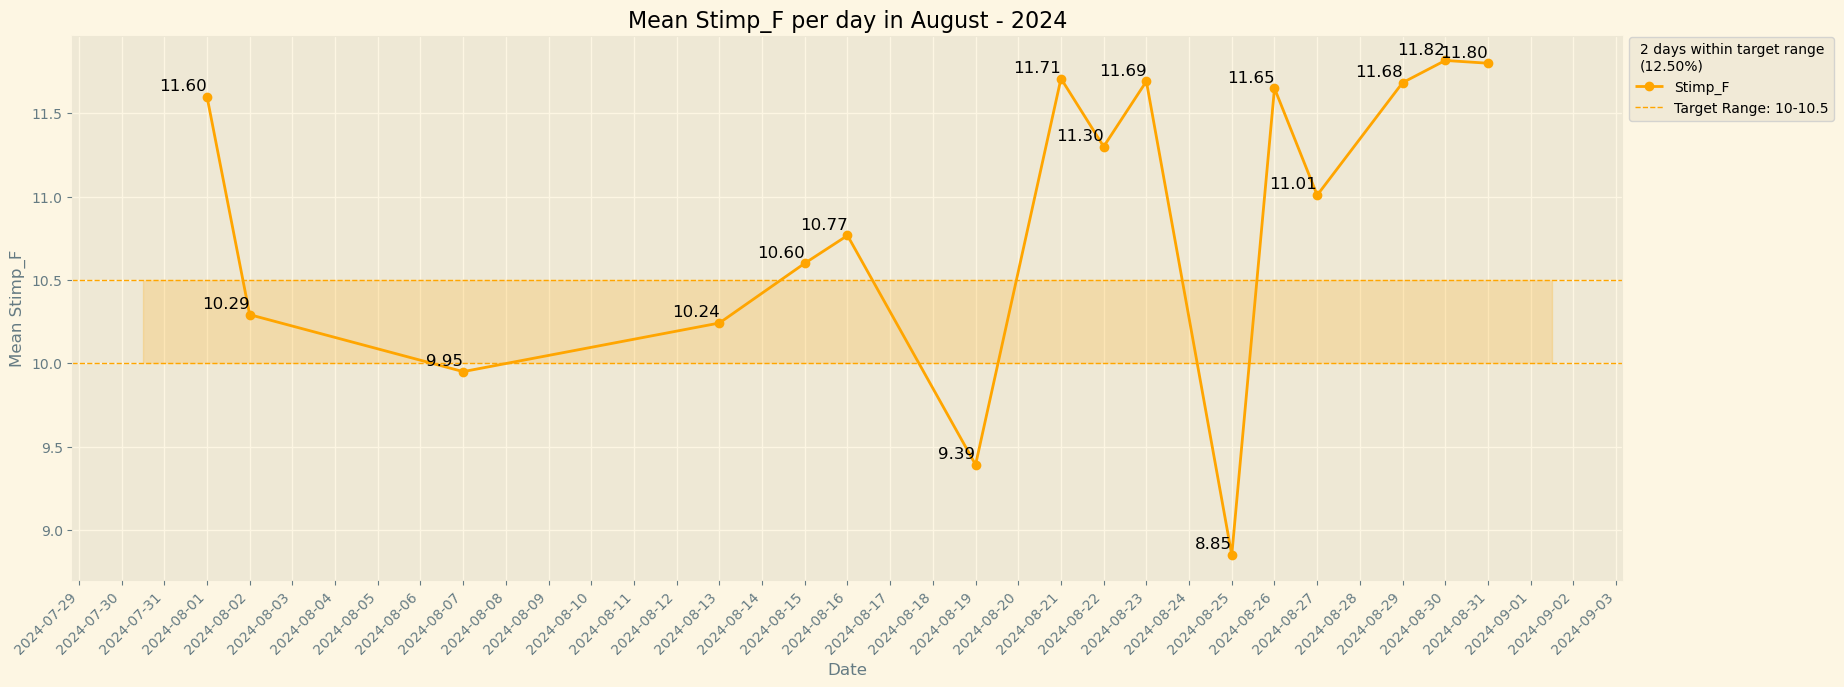

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the target range
target_min = 10
target_max = 10.5

# Filter data for August 2024
month = 8  # Example for August
year = 2024
filtered_df = dfstimp[(dfstimp['Month'] == month) & (dfstimp['Year'] == year)]

# Group the data by 'Dato' and calculate the mean of 'Stimp F'
mean_stimp_f = filtered_df.groupby('Dato')['Stimp_F'].mean()

# Count how many days the mean Stimp_F was within the target range
in_target_range = mean_stimp_f[(mean_stimp_f >= target_min) & (mean_stimp_f <= target_max)].count()

# Calculate the percentage of days within the target range
total_days = mean_stimp_f.count()
percentage_in_target_range = (in_target_range / total_days) * 100

# Print the result (optional, for debugging)
print(f"Number of days in August {year} with Stimp_F within target range: {in_target_range}")
print(f"Percentage of days within target range: {percentage_in_target_range:.2f}%")

# Plot the line graph for mean stimp f per day
plt.figure(figsize=(20, 8))
mean_stimp_f.plot(kind='line', marker='o', color='orange')
plt.title(f'Mean Stimp_F per day in August - {year}')
plt.xlabel('Date')
plt.ylabel('Mean Stimp_F')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Add horizontal lines for the target range
plt.axhline(y=target_min, color='orange', linestyle='--', linewidth=1, label=f'Target Range: {target_min}-{target_max}')
plt.axhline(y=target_max, color='orange', linestyle='--', linewidth=1)

# Shade the area between the target range
plt.fill_between(ax.get_xlim(), target_min, target_max, color='orange', alpha=0.2)

# Annotate each data point with its value
for x, y in zip(mean_stimp_f.index, mean_stimp_f.values):
    plt.text(x, y + 0.02, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add the count and percentage to the legend
legend_text = (f'{in_target_range} days within target range\n'
               f'({percentage_in_target_range:.2f}%)')
ax.legend(title=legend_text, loc='upper left', bbox_to_anchor=(1, 1.01))

# Show the plot
plt.show()


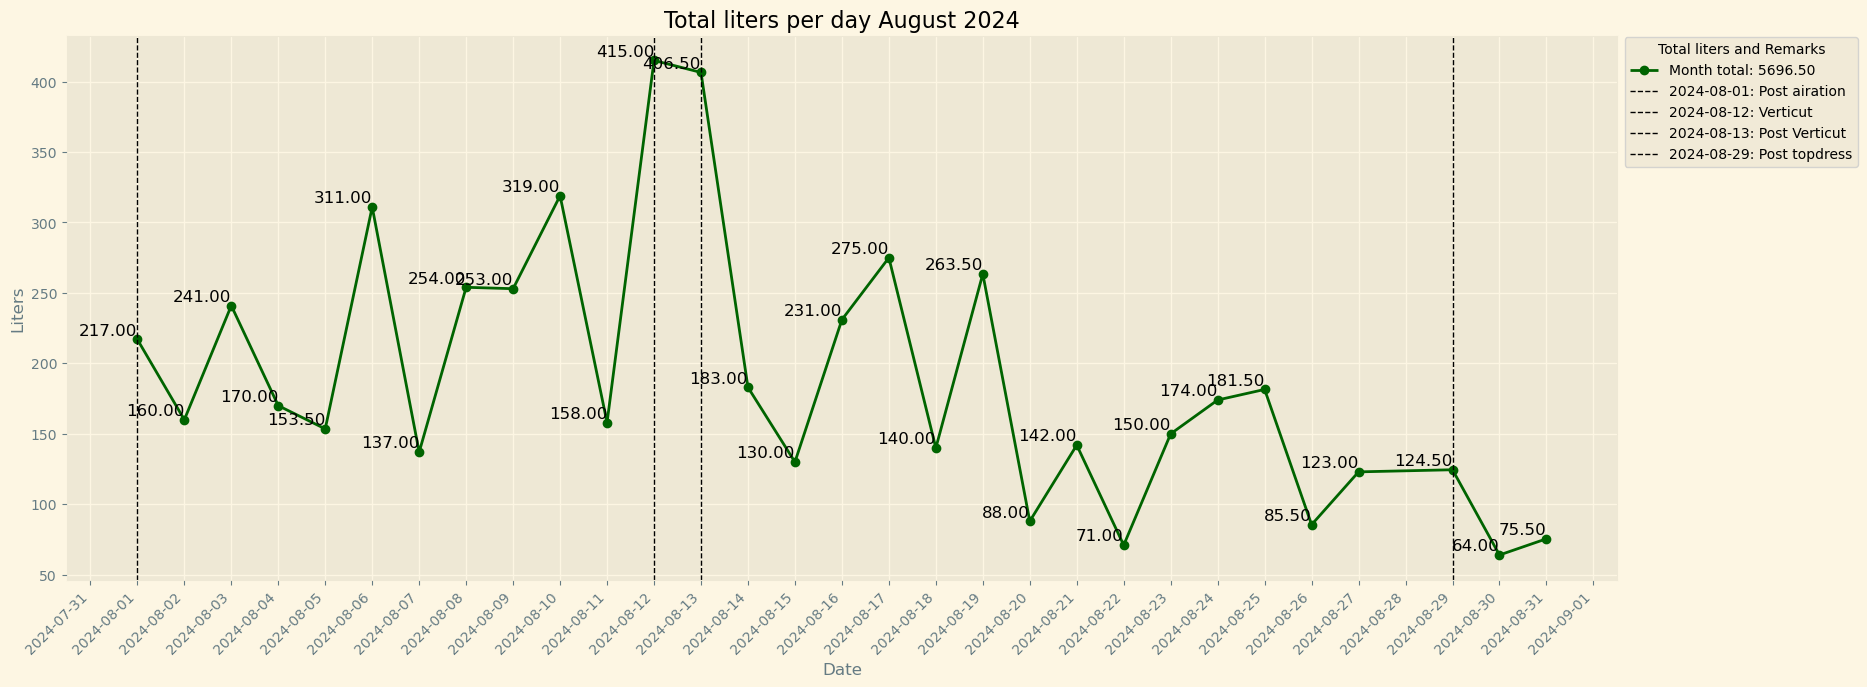

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter data for August 2024
month = 8  # Example for August
year = 2024
line_month = dfklip[(dfklip['Year'] == year) & (dfklip['Dato'].dt.month == month)]

line_month['Hul'] = line_month['Hul'].astype(str)
line_month['Liter'] = line_month['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_month.groupby('Dato')['Liter'].sum()

# Calculate total liters for the month
total_month_liters = line_month['Liter'].sum()

# Get dates and remarks with 'Bemærkning' values
bem_dates = line_month[line_month['Bemærkning'].notnull()][['Dato', 'Bemærkning']].drop_duplicates()

# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day August 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add vertical lines for dates with 'Bemærkning' and build the legend text
legend_text = [f'Month total: {total_month_liters:.2f}']
for index, row in bem_dates.iterrows():
    plt.axvline(x=row['Dato'], color='black', linestyle='--', linewidth=1)
    legend_text.append(f"{row['Dato'].strftime('%Y-%m-%d')}: {row['Bemærkning']}")

# Update the legend to show total for the month and remarks
ax.legend(legend_text, loc='upper right', title='Total liters and Remarks', bbox_to_anchor=(1.16, 1.01))

plt.show()


In [22]:


# Standardizing the 'Hul' column to string
dfklip['Hul'] = dfklip['Hul'].astype(str)
dfstimp['Hul'] = dfstimp['Hul'].astype(str)

# Ensuring 'Dato' is in datetime format
dfklip['Dato'] = pd.to_datetime(dfklip['Dato'])
dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'])

# Merging based on 'Dato' and 'Hul'
merged_df = pd.merge(dfklip, dfstimp, on=['Dato', 'Hul'], how='left')
merged_df.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,...,Unnamed: 12,Week_x,Month_x,Year_x,Stimp_CM,Stimp_F,Stimp_range,Week_y,Month_y,Year_y
0,2023-04-16,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
1,2023-04-16,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
2,2023-04-16,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
3,2023-04-16,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
4,2023-04-16,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN


In [14]:
# Filter data for weeks 36 and 37 of 2024
week_start = 36
week_end = 37
year = 2024

# Filter the data for the weeks
klippelog_filtered = dfklip[(dfklip['Dato'].dt.isocalendar().week >= week_start) & 
                                  (dfklip['Dato'].dt.isocalendar().week <= week_end) &
                                  (dfklip['Dato'].dt.year == year)]

# Ensure 'Liter' is a valid float type
klippelog_filtered['Liter'] = klippelog_filtered['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group by 'Dato' and sum 'Liter' column
line_liter = klippelog_filtered.groupby('Dato')['Liter'].sum()

# Calculate total liters for the time period (weeks 36 and 37)
total_week_liters = klippelog_filtered['Liter'].sum()

# Filter out 'Cut greens' and 'Roll greens' from the green events
green_events_filtered = green_events_df[~green_events_df['Event'].isin(['Cut greens', 'Roll greens'])]

# Get dates and events with remarks (non-null events)
event_dates = green_events_filtered[['Dato', 'Event']].drop_duplicates()

# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day - Weeks 36 and 37, 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add vertical lines for dates with events and build the legend text
legend_text = [f'Total liters for period: {total_week_liters:.2f}']
for index, row in event_dates.iterrows():
    plt.axvline(x=row['Dato'], color='black', linestyle='--', linewidth=1)
    legend_text.append(f"{row['Dato'].strftime('%Y-%m-%d')}: {row['Event']}")

# Update the legend to show total for the period and events
ax.legend(legend_text, loc='upper right', title='Total liters and Events', bbox_to_anchor=(1.16, 1.01))

# Show the plot
plt.show()

NameError: name 'green_events_df' is not defined